# Descriptive statistics and PCA Analysis for iris data in R

![iris dataset](https://image.ibb.co/gbH3ue/iris.png)

In [1]:
#Load the iris dataset
library(datasets)
data(iris)
head(iris) # first 6 rows

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
# the structure of the data set
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
colSums(is.na(iris)) #compute the total missing values in each column

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
           0            0            0            0            0

In [4]:
#install.packages("tidyverse")
#library(tidyverse)
duplicated(iris)
which(duplicated(iris))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 143

In [5]:
# removed row 143
iris <-  iris[!duplicated(iris), ]
str(iris)

'data.frame':	149 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
summary(iris)  #Summary of a single variable

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.000   Min.   :0.100   setosa    :50  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:50  
 Median :5.800   Median :3.00   Median :4.300   Median :1.300   virginica :49  
 Mean   :5.844   Mean   :3.06   Mean   :3.749   Mean   :1.195                  
 3rd Qu.:6.400   3rd Qu.:3.30   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

In [7]:
#install.packages("psych")
library(psych) # using another summary function; https://www.personality-project.org/r/html/describe.html

Warning message:
"package 'psych' was built under R version 3.5.3"

In [8]:
describe(iris)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Sepal.Length,1,149,5.843624,0.8308513,5.8,5.809091,1.03782,4.3,7.9,3.6,0.30655585,-0.622330,0.06806599
Sepal.Width,2,149,3.059732,0.4363422,3.0,3.047107,0.44478,2.0,4.4,2.4,0.30099210,0.136191,0.03574655
Petal.Length,3,149,3.748993,1.7677906,4.3,3.746281,1.92738,1.0,6.9,5.9,-0.25782745,-1.422839,0.14482304
Petal.Width,4,149,1.194631,0.7626222,1.3,1.178512,1.03782,0.1,2.5,2.4,-0.08827065,-1.357677,0.06247644
Species*,5,149,1.993289,0.8178469,2.0,1.991736,1.48260,1.0,3.0,2.0,0.01218523,-1.514884,0.06700063


In [9]:
describeBy(iris,iris$Species)


 Descriptive statistics by group 
group: setosa
             vars  n mean   sd median trimmed  mad min max range skew kurtosis
Sepal.Length    1 50 5.01 0.35    5.0    5.00 0.30 4.3 5.8   1.5 0.11    -0.45
Sepal.Width     2 50 3.43 0.38    3.4    3.42 0.37 2.3 4.4   2.1 0.04     0.60
Petal.Length    3 50 1.46 0.17    1.5    1.46 0.15 1.0 1.9   0.9 0.10     0.65
Petal.Width     4 50 0.25 0.11    0.2    0.24 0.00 0.1 0.6   0.5 1.18     1.26
Species*        5 50 1.00 0.00    1.0    1.00 0.00 1.0 1.0   0.0  NaN      NaN
               se
Sepal.Length 0.05
Sepal.Width  0.05
Petal.Length 0.02
Petal.Width  0.01
Species*     0.00
------------------------------------------------------------ 
group: versicolor
             vars  n mean   sd median trimmed  mad min max range  skew kurtosis
Sepal.Length    1 50 5.94 0.52   5.90    5.94 0.52 4.9 7.0   2.1  0.10    -0.69
Sepal.Width     2 50 2.77 0.31   2.80    2.78 0.30 2.0 3.4   1.4 -0.34    -0.55
Petal.Length    3 50 4.26 0.47   4.35    4.29 0.5

In [10]:
## Calculating the group mean using aggregate
aggregate(. ~ iris$Species, iris, mean)

iris$Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
setosa,5.006000,3.428000,1.462000,0.246000,1
versicolor,5.936000,2.770000,4.260000,1.326000,2
virginica,6.604082,2.979592,5.561224,2.028571,3


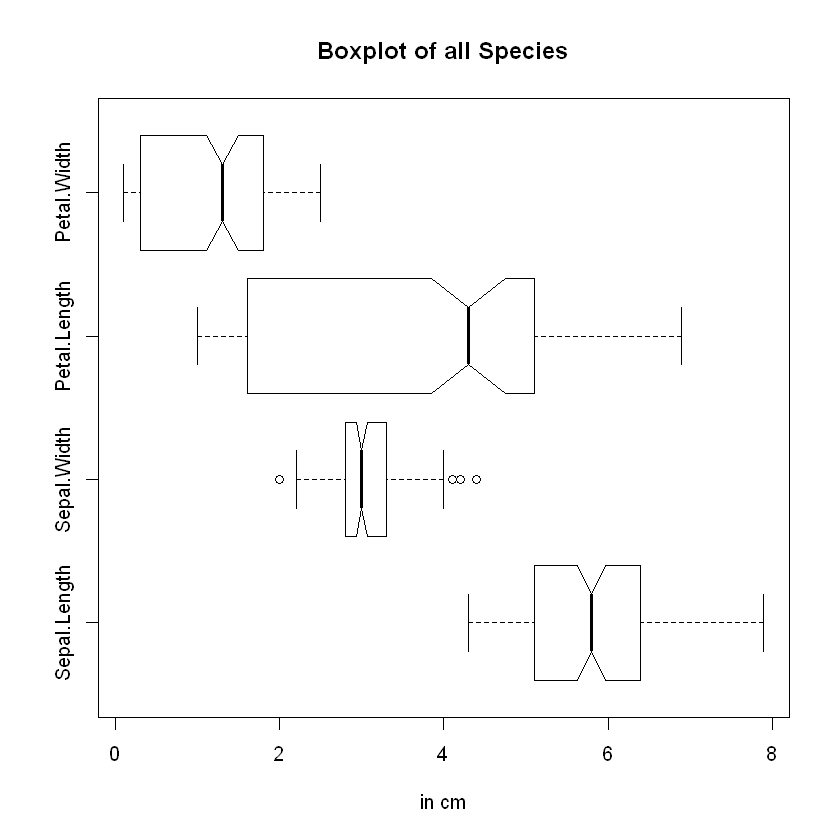

In [11]:
## Draws a box plot for lengths and widths of sepals and petals of 3 species
boxplot((iris)[,c(1:4)], main="Boxplot of all Species", xlab="in cm", horizontal = TRUE,notch = TRUE) 

In [66]:
# https://stackoverflow.com/questions/11134348/how-can-i-identify-the-labels-of-outliers-in-a-r-boxplot
outliers = boxplot(iris$Sepal.Width, plot=FALSE)$out
iris[iris$Sepal.Width %in% outliers,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor


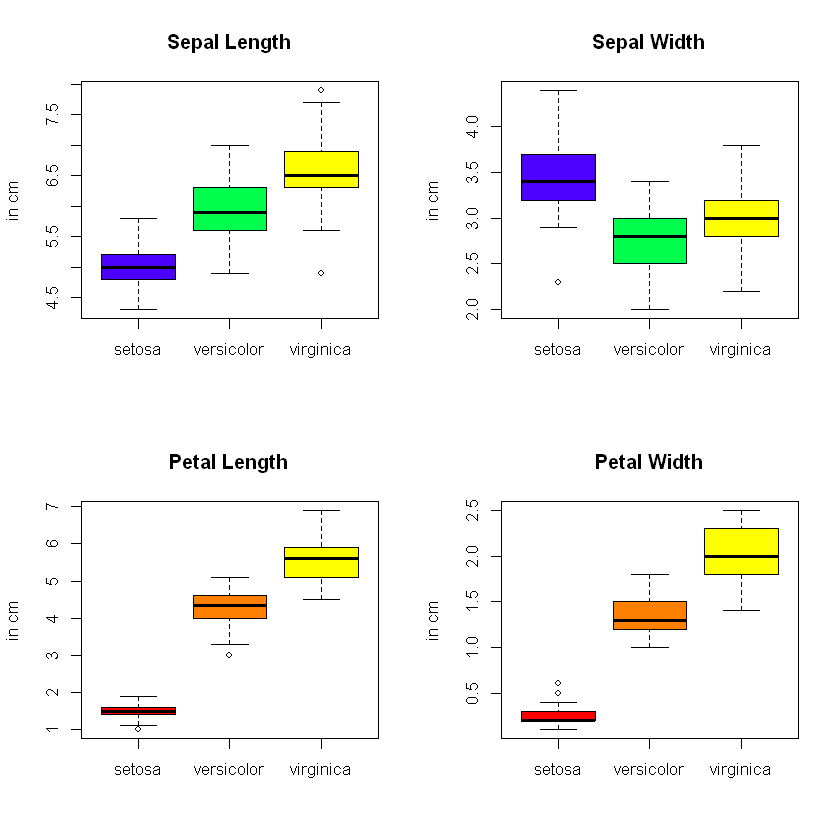

In [12]:
par(mfrow=c(2,2))
boxplot(iris$Sepal.Length~iris$Species,col=topo.colors(3), main="Sepal Length", ylab="in cm")
boxplot(iris$Sepal.Width~iris$Species,col=topo.colors(3) , main="Sepal Width" , ylab="in cm" )
boxplot(iris$Petal.Length~iris$Species,col=heat.colors(3), main="Petal Length", ylab="in cm")
boxplot(iris$Petal.Width~iris$Species,col=heat.colors(3), main="Petal Width", ylab="in cm")

In [65]:
outliers = boxplot(iris$Sepal.Length~iris$Species, plot=FALSE)$out
outliers

[1] 4.9 7.9

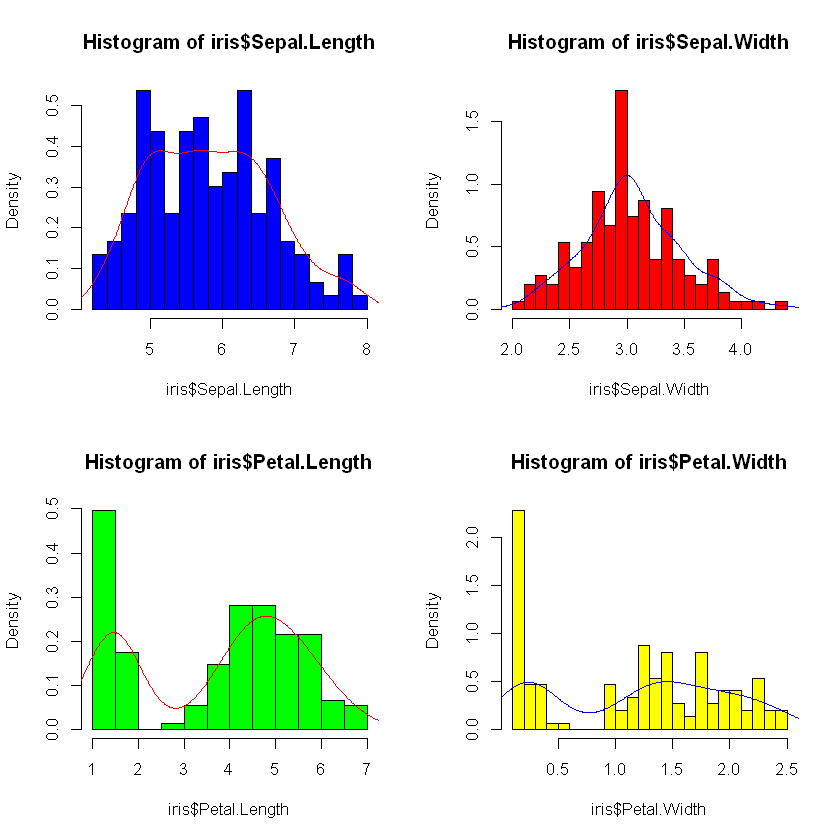

In [13]:
## https://rpubs.com/jayavarshinii/Knn-iris
par(mfrow=c(2,2))
hist(iris$Sepal.Length, col="blue", breaks=20,freq=FALSE )
lines(density(iris$Sepal.Length), col="red")

hist(iris$Sepal.Width, col="red", breaks=20,,freq=FALSE)
lines(density(iris$Sepal.Width), col="blue")

hist(iris$Petal.Length, col="green", breaks=20,freq=FALSE)
lines(density(iris$Petal.Length), col="red")

hist(iris$Petal.Width, col="yellow", breaks=20,freq=FALSE)
lines(density(iris$Petal.Width), col="blue")

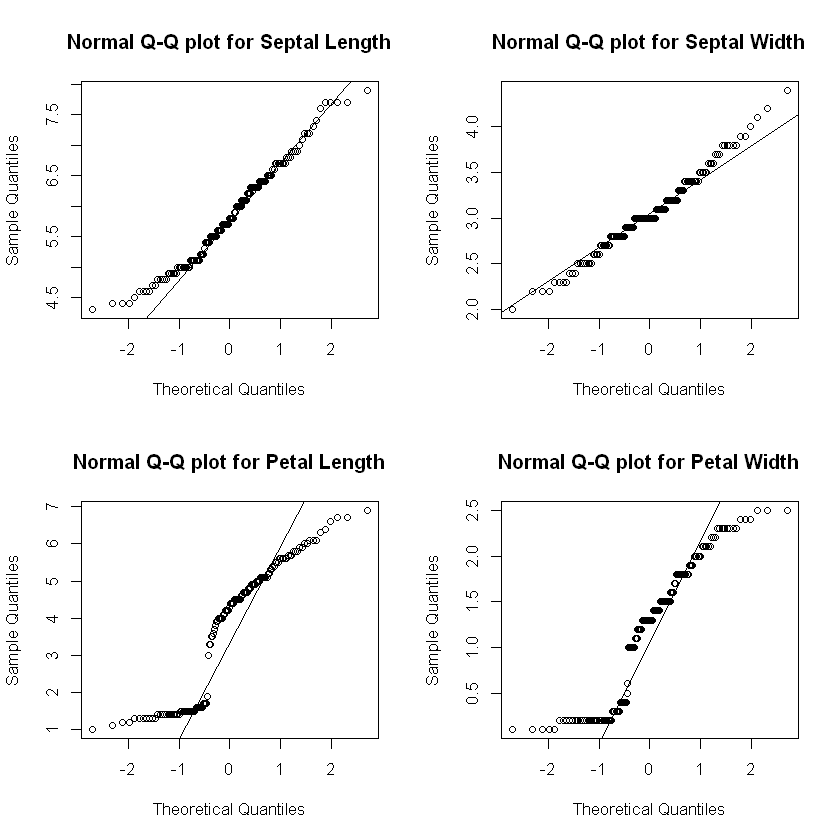

In [14]:
# Quantile – Quantile plot in R to test the normality of a data
# Sepal length and Sepal width are most close along the 1:1 line.
par(mfrow=c(2,2))
qqnorm(iris$Sepal.Length,main="Normal Q-Q plot for Septal Length")
qqline(iris$Sepal.Length)
qqnorm(iris$Sepal.Width,main="Normal Q-Q plot for Septal Width")
qqline(iris$Sepal.Width)
qqnorm(iris$Petal.Length, main="Normal Q-Q plot for Petal Length")
qqline(iris$Petal.Length)
qqnorm(iris$Petal.Width,main="Normal Q-Q plot for Petal Width")
qqline(iris$Petal.Width)

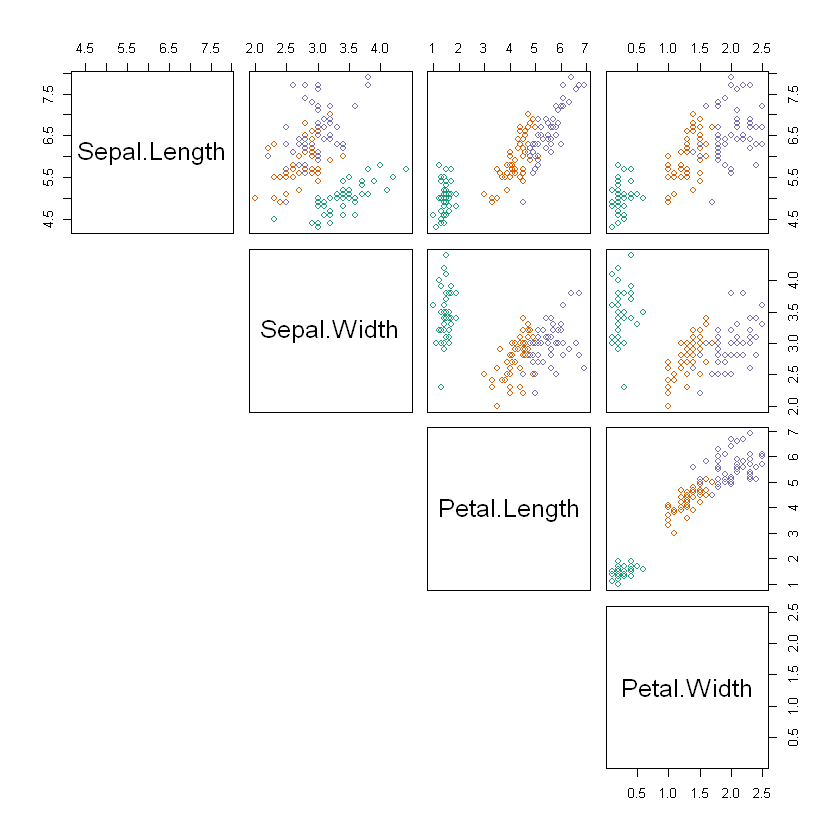

In [44]:
## https://stats.idre.ucla.edu/r/codefragments/layout/
## define a (nominally) colour blind safe pallette
pal <- rgb(c(27, 217, 117), c(158, 95, 112), c(119, 2, 179), maxColorValue = 255)
## scatter plot matrix of continuous variables, coloured by species
plot(iris[, -5], col = pal[iris[, 5]],lower.panel=NULL)


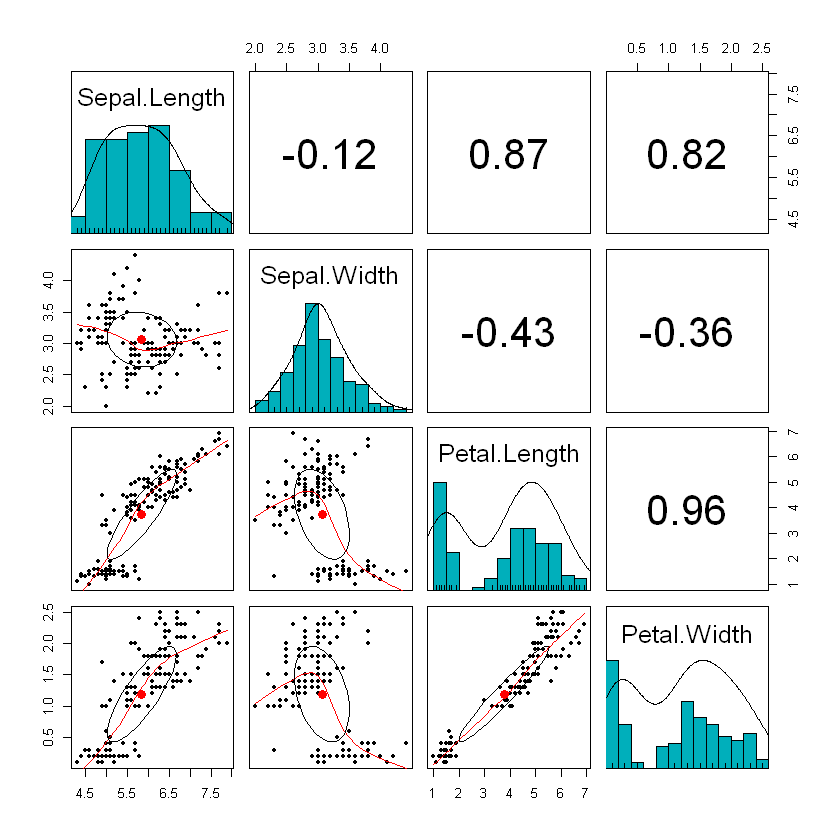

In [16]:
## http://www.sthda.com/english/wiki/scatter-plot-matrices-r-base-graphs
##library(psych)
pairs.panels(iris[,-5], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

In [17]:
## http://naes.unr.edu/shoemaker/teaching/R-Bootcamp/module1_3.html

plot.colors <- c("violet", "purple", "blue")   # define the colors for representing species ID
names(plot.colors) <- levels(iris$Species)   # the "levels()" function returns all unique labels for any "factor" variable    
plot.colors

setosa versicolor  virginica 
  "violet"   "purple"     "blue"

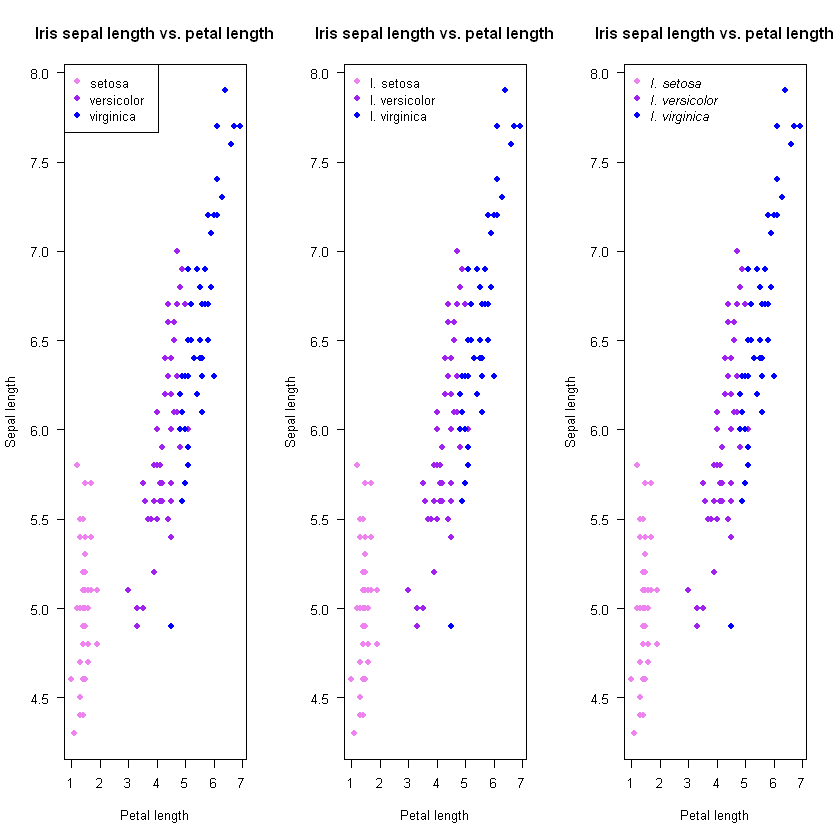

In [18]:
## http://naes.unr.edu/shoemaker/teaching/R-Bootcamp/module1_3.html

color.vector <- rep(x=plot.colors, each=50)
layout(matrix(1:3, nrow=1, ncol=3))
# Plot
plot(x=iris$Petal.Length, y=iris$Sepal.Length, pch=19, col=color.vector, 
     main="Iris sepal length vs. petal length", xlab="Petal length", 
     ylab="Sepal length", las=1)

# First legend
legend("topleft", pch=19, col=plot.colors, legend=unique(iris$Species))

# Second plot
plot(x=iris$Petal.Length, y=iris$Sepal.Length, pch=19, col=color.vector,
     main="Iris sepal length vs. petal length", 
     xlab="Petal length", ylab="Sepal length", las=1)

# Second legend
# The bty="n" argument suppresses the border around the legend. (A personal preference)
legend("topleft", pch=19, col=plot.colors, 
       legend=c("I. setosa", "I. versicolor", "I. virginica"), bty="n")


# Plot Three
plot(x=iris$Petal.Length, y=iris$Sepal.Length, pch=19, col=color.vector, 
     main="Iris sepal length vs. petal length", 
     xlab="Petal length", ylab="Sepal length", las=1)

#Legend tree with Italics
legend("topleft", pch=19, col=plot.colors, 
       legend=c("I. setosa", "I. versicolor", "I. virginica"), 
       bty="n", text.font=3)

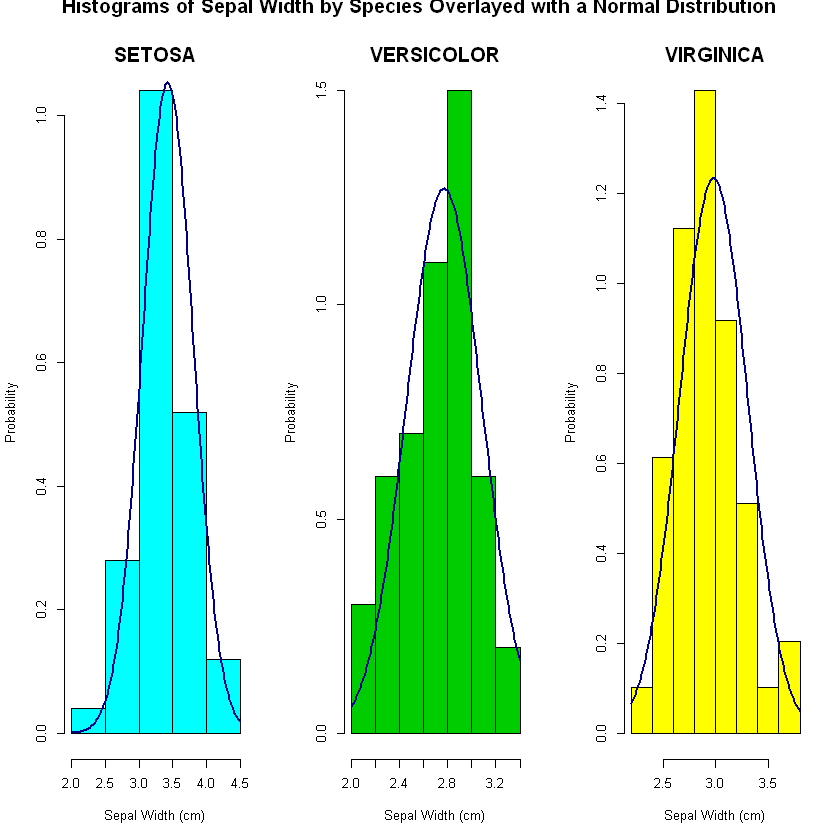

In [19]:
## https://stackoverflow.com/questions/42758483/how-can-i-make-this-histogram-of-a-dataset-variable-overplayed-with-its-normal

species_list <- split(iris, iris$Species) # split data.frame into lists by Species

par(mfrow = c(1,length(species_list))) # set the grid of the plot to be 1 row, 3 columns 
for(i in 1:length(species_list)){ # using length(species_list) for the # of species
  # subsetting lists with double brackets `[[`
  hist(species_list[[i]]$Sepal.Width, probability = T, 
       main = "", xlab = "Sepal Width (cm)", ylab = "Probability", # `main` is empty
       col = c("cyan","green3","yellow")[i]) # picks a new color each time (here out of 3)
  # my favorite function for plot titles
  mtext(toupper(names(species_list)[i]), # upper case species name for title
        side = 3, # 1 is bottom, 2 is left, 3 is top, 4 is right
        line = 0, # do not shift up or down
        font = 2) # 2 is bold
  # Simpler than building from scratch use the built in function:
  curve(dnorm(x, mean = mean(species_list[[i]]$Sepal.Width), 
                 sd = sd(species_list[[i]]$Sepal.Width)), 
                 yaxt = "n", add = TRUE, col = "darkblue", lwd = 2)
}
# At the end post a new title
mtext("Histograms of Sepal Width by Species Overlayed with a Normal Distribution", 
      outer = TRUE, # this puts it outside of the 3 plots
      side = 3, line = -1, # shift it down so we can see it
      font = 2)
par(mfrow = c(1,1)) # set the plot parameters back to a single plot when finished

In [20]:
## https://www.kaggle.com/learnerr/analysis-of-iris-data-in-r
## Explore multiple data
# Check the covariance and correlation between variables
## “Covariance” indicates the direction of the linear relationship between variables. 
## “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. 
## Correlation is a function of the covariance.
print("covariance between variables")
cov(iris[, 1:4])

[1] "covariance between variables"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.69031380,-0.04282605,1.2833212,0.5199655
Sepal.Width,-0.04282605,0.19039452,-0.3286219,-0.1207582
Petal.Length,1.28332124,-0.32862189,3.1250834,1.2979675
Petal.Width,0.51996554,-0.12075821,1.2979675,0.5815926


In [21]:
## https://www.kaggle.com/learnerr/analysis-of-iris-data-in-r
# correlation is positive when the values increases together
# correlation in negative when the values decreses together
## The values of the correlation coefficient can range from -1 to +1. 
## The closer it is to +1 or -1, the more closely are the two variables are related. 
print("correlation between variables")
cor(iris[, 1:4])

[1] "correlation between variables"


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1181293,0.8737381,0.8206195
Sepal.Width,-0.1181293,1.0000000,-0.4260283,-0.3628942
Petal.Length,0.8737381,-0.4260283,1.0000000,0.9627723
Petal.Width,0.8206195,-0.3628942,0.9627723,1.0000000


The previous assertion that Petal.Length and Petal.Width are highly positively cor-related  is  misleading.   When  looking  at  individual  species,  it  transpires  that  the within-species correlation between between Petal.Length and Petal.Width is muchweaker.   The  correlation  is  strongest  for  Versicolor  (0.79),  being  much  weaker  for Setosa (0.33) and Virginica (0.32).  The reason for the higher positive correlationwhen  combining  the  three  species  (0.96)  is  due  to  systematic  differences  in  thePetal.Length  and  Petal.Width  between  the  species.   Indeed,  it  may  be  true  that species  with  a  larger  Petal.Length  would  also  tend  to  have  a  larger  Petal.Width(although note that we could not draw such conclusions without testing hypothesesproperly)

In [22]:
for(i in 1:length(levels(iris$Species)->x)){
    print(x[i])
    print(cor(iris[iris$Species==x[i],1:4]))
    }

[1] "setosa"
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000   0.7425467    0.2671758   0.2780984
Sepal.Width     0.7425467   1.0000000    0.1777000   0.2327520
Petal.Length    0.2671758   0.1777000    1.0000000   0.3316300
Petal.Width     0.2780984   0.2327520    0.3316300   1.0000000
[1] "versicolor"
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000   0.5259107    0.7540490   0.5464611
Sepal.Width     0.5259107   1.0000000    0.5605221   0.6639987
Petal.Length    0.7540490   0.5605221    1.0000000   0.7866681
Petal.Width     0.5464611   0.6639987    0.7866681   1.0000000
[1] "virginica"
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length    1.0000000   0.4457975    0.8629507   0.2742820
Sepal.Width     0.4457975   1.0000000    0.3922417   0.5348105
Petal.Length    0.8629507   0.3922417    1.0000000   0.3171980
Petal.Width     0.2742820   0.5348105    0.3171980   1.0000000


With 95% confidence, what can we say about the difference in the mean petal lengths of versicolor and virginica?

In [23]:
virginica <- iris[iris$Species == "virginica", ]
versicolor <- iris[iris$Species == "versicolor", ]
shapiro.test(virginica$Petal.Length)


	Shapiro-Wilk normality test

data:  virginica$Petal.Length
W = 0.96553, p-value = 0.1597


In [24]:
shapiro.test(versicolor$Petal.Length)


	Shapiro-Wilk normality test

data:  versicolor$Petal.Length
W = 0.966, p-value = 0.1585


In [25]:
require(car)  
df<-rbind(virginica,versicolor)   # or df <- subset(iris, iris$Species == "virginica" | iris$Species == "versicolor") 
leveneTest(Petal.Length ~ Species , data=df)   ## check Homogeneity of variances

Loading required package: car
Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"
Attaching package: 'car'

The following object is masked from 'package:psych':

    logit



,Df,F value,Pr(>F)
group,1,0.9944598,0.321136
,97,NA,NA


In [26]:
virginica.v.versicolor <- t.test(x = virginica$Petal.Length, y = versicolor$Petal.Length)
virginica.v.versicolor


	Welch Two Sample t-test

data:  virginica$Petal.Length and versicolor$Petal.Length
t = 12.595, df = 93.864, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.096093 1.506356
sample estimates:
mean of x mean of y 
 5.561224  4.260000 


The results include:

    Test statistic, degrees of freedom, and p-value
    The confidence interval for the difference in means between the two data sets
    With 95% confidence we can say that the difference between the mean petal lengths of virginica and versicolor lie between (1.096093, 1.506356) in nature.
    The means of each data set

So we reject the hypothesis that these species have the same petal lengths, in favour of the alternate hypothesis that the means are indeed different in nature.

https://jcoliver.github.io/learn-r/002-intro-stats.html#solution-to-challenge-2

Use ANOVA to test for differences in sepal width among the three species. What is the value of the F-statistic?

In [27]:
sepal.width.aov <- aov(formula = Sepal.Width ~ Species, data = iris)
summary(object = sepal.width.aov)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.29   5.646   48.82 <2e-16 ***
Residuals   146  16.89   0.116                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The F-statistic = 48.82, and the p-value is quite small, so there are significant sepal width differences among species.

In [28]:
# Post-hoc Tests
# Tukey's Honest Significant Difference Test
TukeyHSD(sepal.width.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                           diff         lwr        upr     p adj
versicolor-setosa    -0.6580000 -0.81905158 -0.4969484 0.0000000
virginica-setosa     -0.4484082 -0.61027935 -0.2865370 0.0000000
virginica-versicolor  0.2095918  0.04772065  0.3714630 0.0072542


Using an alpha of 0.05, we can see that the p adj value is less than our alpha in all three pairwise comparisons meaning there is a significant difference between all three species' means.


Pairwise T-Test http://jamesmarquezportfolio.com/one_way_anova_with_post_hocs_in_r.html

If you prefer to do t-tests, you can use the following method to perform pairwise t-tests on all your factor levels. The pairwise.t.test() function allows you to choose between eight p-value adjustments to help counteract the problem of multiple comparisons: holm, hochberg, hommel, bonferroni, BH, BY, fdr, and none. To reduce the chance of incorrectly rejecting our null hypothesis (Type I error) we'll use the Bonferroni correction method when performing our multiple comparisons.


In [29]:
pairwise.t.test(iris$Sepal.Width, iris$Species, 
                p.adj="bonferroni", paired=FALSE)


	Pairwise comparisons using t tests with pooled SD 

data:  iris$Sepal.Width and iris$Species 

           setosa  versicolor
versicolor < 2e-16 -         
virginica  2.6e-09 0.0078    

P value adjustment method: bonferroni 

Our t-test comparisons show that all three species' means are significantly different because all p-values are less than our 0.05 alpha.

## Question: We want to know if there is any significant difference, in sepal and petal length, between the different species.

Assumptions of MANOVA (http://www.sthda.com/english/wiki/manova-test-in-r-multivariate-analysis-of-variance)

MANOVA can be used in certain conditions:

    The dependent variables should be normally distribute within groups. The R function mshapiro.test( )[in the mvnormtest package] can be used to perform the Shapiro-Wilk test for multivariate normality. This is useful in the case of MANOVA, which assumes multivariate normality.

    Homogeneity of variances across the range of predictors.

    Linearity between all pairs of dependent variables, all pairs of covariates, and all dependent variable-covariate pairs in each cell



In [30]:
sepl <- iris$Sepal.Length
petl <- iris$Petal.Length
# MANOVA test
res.man <- manova(cbind(Sepal.Length, Petal.Length) ~ Species, data = iris)
summary(res.man)

           Df Pillai approx F num Df den Df    Pr(>F)    
Species     2  0.992   71.841      4    292 < 2.2e-16 ***
Residuals 146                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [31]:
# Look to see which differ
summary.aov(res.man)

 Response Sepal.Length :
             Df Sum Sq Mean Sq F value    Pr(>F)    
Species       2 63.844  31.922  121.61 < 2.2e-16 ***
Residuals   146 38.323   0.262                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response Petal.Length :
             Df Sum Sq Mean Sq F value    Pr(>F)    
Species       2 435.50 217.749  1176.8 < 2.2e-16 ***
Residuals   146  27.01   0.185                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


From the output above, it can be seen that the two variables are highly significantly different among Species.

Notice that in the following code we apply a log transformation to the continuous variables as suggested by [Venables, W. N., Brian D. R. Modern applied statistics with S-PLUS. Springer-verlag. (Section 11.1)] 
and set center and scale. equal to TRUE in the call to prcomp to standardize the variables prior to the application of PCA.
Since skewness and the magnitude of the variables influence the resulting PCs, it is good practice to apply skewness transformation, center and scale the variables prior to the application of PCA. In the example above, we applied a log transformation to the variables but we could have been more general and applied a Box and Cox transformation [Box, G. and Cox, D. (1964). An analysis of transformations. Journal of the Royal Statistical Society. Series B (Methodological) 211-252].

In [32]:
## https://tgmstat.wordpress.com/2013/11/28/computing-and-visualizing-pca-in-r/#ref2
# log transform 
log.ir <- log(iris[, 1:4])
ir.species <- iris[, 5]
 
# apply PCA - scale. = TRUE is highly 
# advisable, but default is FALSE. 
ir.pca <- prcomp(log.ir,
                 center = TRUE,
                 scale. = TRUE) 
# print method
# In this simple case with only 4 PCs this is not a hard task and we can see that the first two PCs explain most of the variability in the data.
print(ir.pca)

Standard deviations (1, .., p=4):
[1] 1.7125418 0.9525251 0.3637980 0.1659741

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3         PC4
Sepal.Length  0.5046733 -0.45194698  0.7098185  0.19288984
Sepal.Width  -0.3010219 -0.89066999 -0.3282272 -0.09143112
Petal.Length  0.5767684 -0.03388546 -0.2179017 -0.78658048
Petal.Width   0.5674759 -0.03609246 -0.5839036  0.57941782


### ALSO can be standardise the data as below:

In [48]:
# It is important to standardise the data first (mean = 0 and standard deviation = 1) as otherwise, the magnitude of a variable could have an influence.
iris_standardised <- scale(iris[,1:4])
head(iris_standardised)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8950148,1.00899810,-1.328774,-1.304225
-1.1357318,-0.13689151,-1.328774,-1.304225
-1.3764487,0.32146433,-1.385341,-1.304225
-1.4968072,0.09228641,-1.272206,-1.304225
-1.0153733,1.23817602,-1.328774,-1.304225
-0.5339393,1.92570978,-1.159070,-1.041972


In [49]:
#Next perform the principle component analysis on these standardised data and display a summary:

pca_iris <- prcomp(iris_standardised)
summary(pca_iris)

Importance of components:
                          PC1    PC2     PC3    PC4
Standard deviation     1.7087 0.9562 0.38111 0.1442
Proportion of Variance 0.7299 0.2286 0.03631 0.0052
Cumulative Proportion  0.7299 0.9585 0.99480 1.0000

The summary shows that the first principle component explains 73% of the variance, the second 96% and the third 99%. All variance is explained by all four components. 

In [50]:
# all variance should add up to the number of variables
sum(pca_iris$sdev^2) 

[1] 4

In [33]:
install.packages("stats")

Installing package into 'C:/Users/Unknown/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'stats' is not available (for R version 3.5.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

In [34]:
summary(ir.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7125 0.9525 0.36380 0.16597
Proportion of Variance 0.7332 0.2268 0.03309 0.00689
Cumulative Proportion  0.7332 0.9600 0.99311 1.00000

## Biplot

[1] "We can now see clearly that Petal.Length, Petal.Width, and Sepal.Length all contribute to PC1, and Sepal.Width dominates PC2."


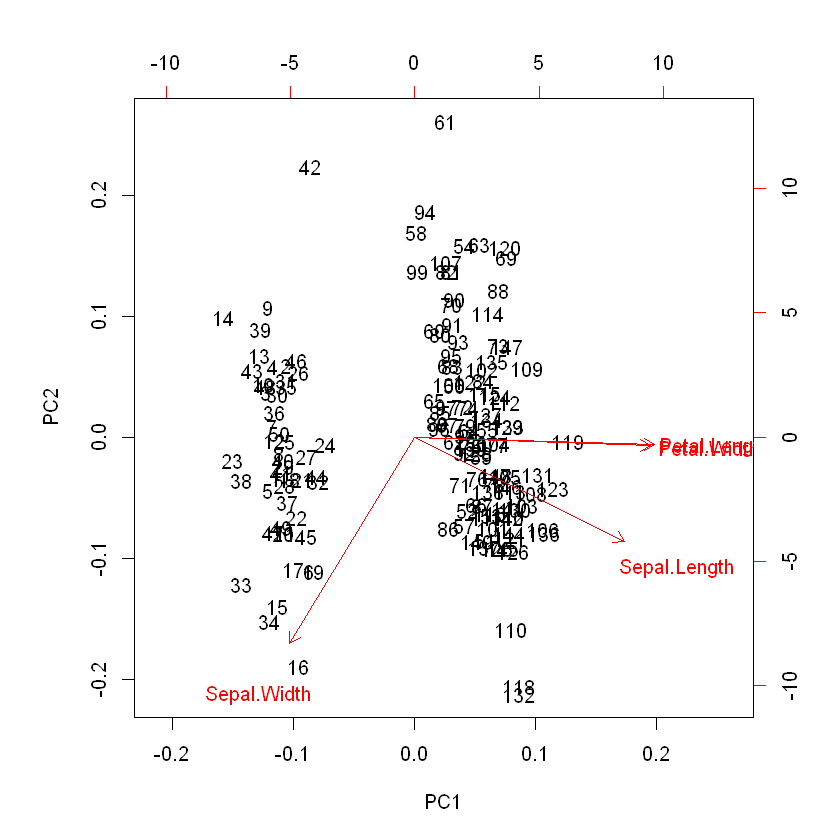

In [35]:
## https://wilkelab.org/classes/SDS348/2016_spring/worksheets/class9.html
print("We can now see clearly that Petal.Length, Petal.Width, and Sepal.Length all contribute to PC1, and Sepal.Width dominates PC2.")
biplot(ir.pca)  

## Scree Plot

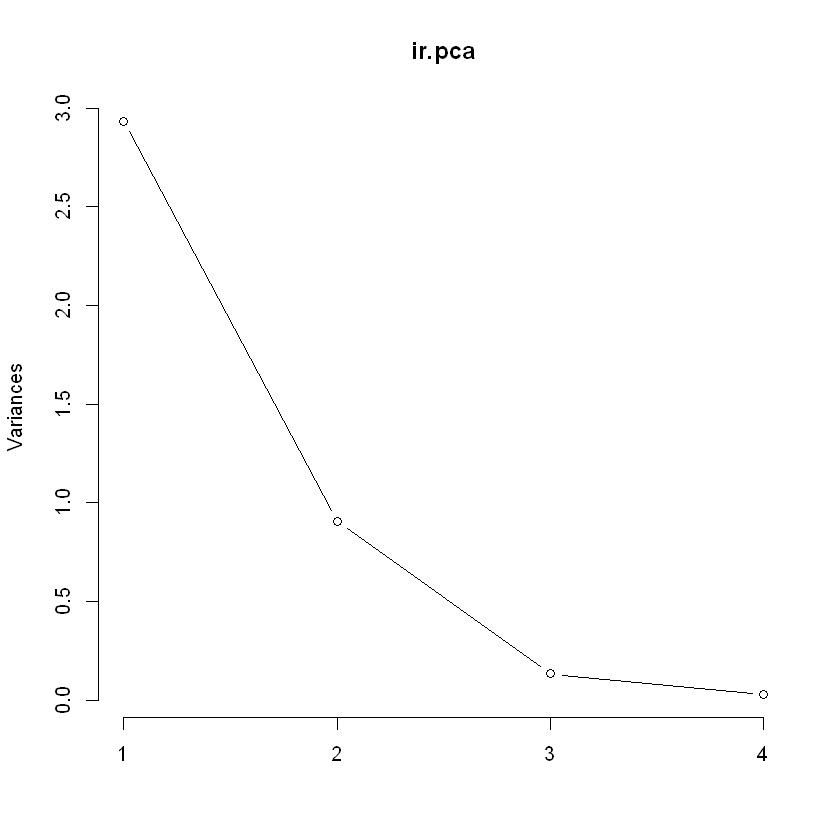

In [36]:
# http://dataaspirant.com/2017/09/01/perform-principal-component-analysis-r/
screeplot(ir.pca, type="lines")

http://pcool.dyndns.org:8080/statsbook/?page_id=2124 <br>
The elbow of the plot is at 3 principle components, so it is reasonable to maintain 2 principle components. Furthermore, according to Kaiser’s criterium, the variance of the last component on the standardised data should be less than 1; so again it is reasonable to use 2 principle components. Finally, to explain at least 80% of the variance, again 2 components are required.

In [45]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



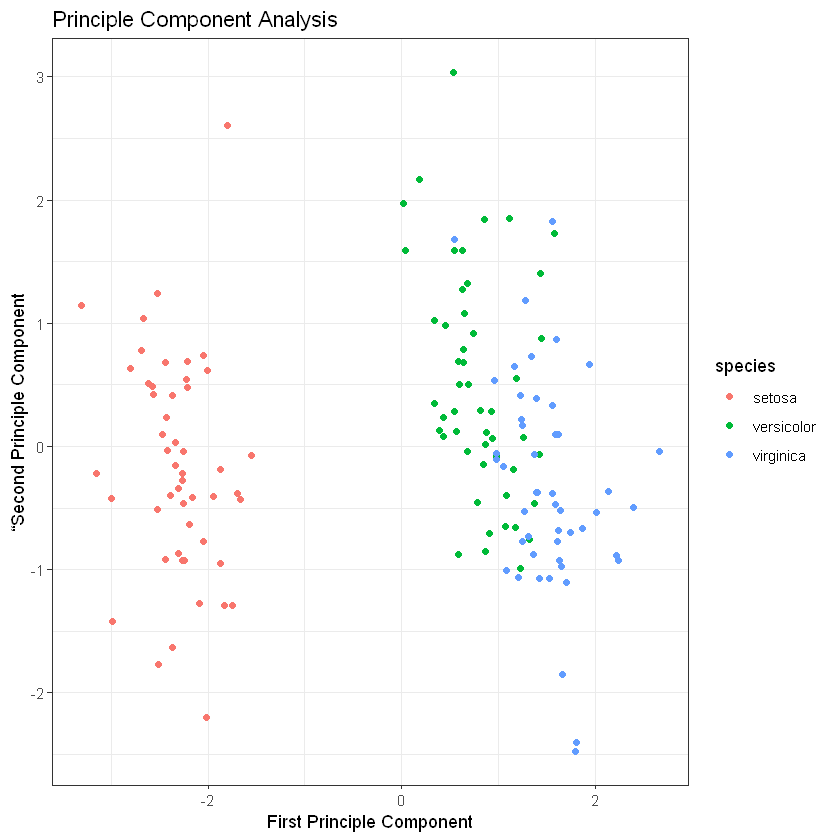

In [47]:
iris_pca_df <- data.frame(first = ir.pca$x[,1], second = ir.pca$x[,2], species = iris$Species)

ggplot(iris_pca_df, aes(x = first, y = second, colour = species)) +
geom_point() +
theme_bw() +
ggtitle("Principle Component Analysis") +
scale_x_continuous("First Principle Component") + scale_y_continuous("“Second Principle Component")

As can be seen the first principle component is good in separating Setosa species from the other two and to a lesser extend in separating Versicolar and Virginica species. The second principle component helps to separate Versicolar and Virginica species.